In [45]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Gold + Silver Pair

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


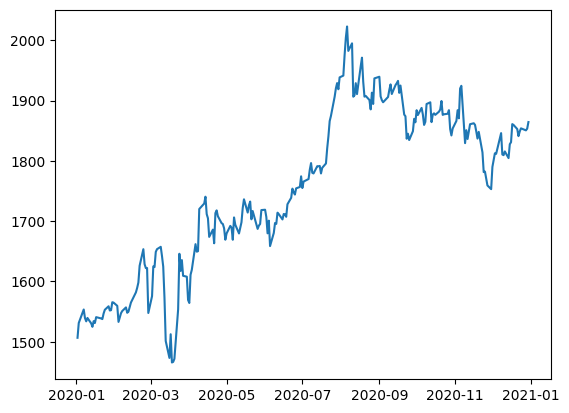

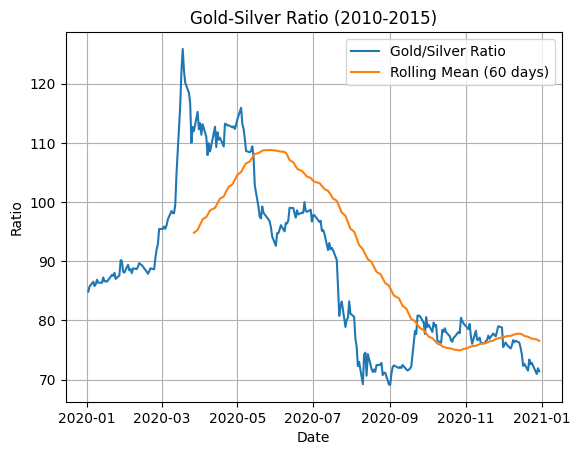

In [10]:
from scipy.optimize import minimize_scalar

# Training data: 2010-01-01 to 2015-12-31
historical_gold = yf.download('GC=F', start='2020-01-01', end='2020-12-31', auto_adjust=False)
historical_silver = yf.download('SI=F', start='2020-01-01', end='2020-12-31', auto_adjust=False)

#plt.plot(gold.index, gold['Close'], label='Gold')
#plt.plot(silver.index, silver['Close'], label='Silver')

historical_spread = historical_gold[('Close', 'GC=F')] - historical_silver[('Close', 'SI=F')]
plt.plot(historical_spread.index, historical_spread, label='Gold-Silver Spread')
plt.show()

historical_ratio = historical_gold[('Close', 'GC=F')] / historical_silver[('Close', 'SI=F')]
plt.plot(historical_ratio.index, historical_ratio, label='Gold/Silver Ratio')

rolling_window = 60 # You can change this value as needed

rolling_mean = historical_ratio.rolling(window=rolling_window).mean() 

plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({rolling_window} days)')
plt.legend()
plt.title('Gold-Silver Ratio (2010-2015)')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.grid(True) 

- Maybe try to find better pairs that are more correlated 
- Test cointegration; stationary; bound range

In [ ]:
from statsmodels.tsa.stattools import adfuller, coint

# ADF test on historical_ratio
adf_result = adfuller(historical_ratio.dropna())
adf_pvalue = adf_result[1]
print(f"ADF test p-value for Gold/Silver ratio: {adf_pvalue:.4f}")

# Engle-Granger cointegration test between gold and silver prices
gold_close = historical_gold[('Close', 'GC=F')]
silver_close = historical_silver[('Close', 'SI=F')]
coint_result = coint(gold_close, silver_close)
coint_pvalue = coint_result[1]
print(f"Engle-Granger cointegration test p-value: {coint_pvalue:.4f}")

# Conclusion: gold-silver ratio is not stationary and not cointegrated based on p-values > 0.05 --> cannot pair trade

ADF test p-value for Gold/Silver ratio: 0.7702
Engle-Granger cointegration test p-value: 0.4002


##### Alternative Equity Pairs

In [38]:
available_stocks = ['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APP', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COIN', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'D', 'DAL', 'DASH', 'DAY', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOC', 'DOV', 'DOW', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EG', 'EIX', 'EL', 'ELV', 'EME', 'EMN', 'EMR', 'EOG', 'EPAM', 'EQIX', 'EQR', 'EQT', 'ERIE', 'ES', 'ESS', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXE', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FICO', 'FIS', 'FITB', 'FOX', 'FOXA', 'FRT', 'FSLR', 'FTNT', 'FTV', 'GD', 'GDDY', 'GE', 'GEHC', 'GEN', 'GEV', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HOOD', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUBB', 'HUM', 'HWM', 'IBKR', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'INVH', 'IP', 'IPG', 'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JBL', 'JCI', 'JKHY', 'JNJ', 'JPM', 'K', 'KDP', 'KEY', 'KEYS', 'KHC', 'KIM', 'KKR', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KVUE', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LII', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNT', 'LOW', 'LRCX', 'LULU', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PANW', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PLD', 'PLTR', 'PM', 'PNC', 'PNR', 'PNW', 'PODD', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSKY', 'PSX', 'PTC', 'PWR', 'PYPL', 'QCOM', 'RCL', 'REG', 'REGN', 'RF', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'RVTY', 'SBAC', 'SBUX', 'SCHW', 'SHW', 'SJM', 'SLB', 'SMCI', 'SNA', 'SNPS', 'SO', 'SOLV', 'SPG', 'SPGI', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SW', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TGT', 'TJX', 'TKO', 'TMO', 'TMUS', 'TPL', 'TPR', 'TRGP', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTD', 'TTWO', 'TXN', 'TXT', 'TYL', 'UAL', 'UBER', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VICI', 'VLO', 'VLTO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VST', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBD', 'WDAY', 'WDC', 'WEC', 'WELL', 'WFC', 'WM', 'WMB', 'WMT', 'WRB', 'WSM', 'WST', 'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'XYZ', 'YUM', 'ZBH', 'ZBRA', 'ZTS', 'SPY', 'QQQ', 'IWM', 'DIA', 'VOO', 'VTI', 'XLE', 'XLF', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'XLI', 'XLB', 'XLRE', 'EFA', 'EEM', 'VEA', 'AGG', 'LQD', 'HYG', 'TLT', 'IEF', 'BND', 'EMB', 'GLD', 'SLV', 'VNQ']
start_date, end_date = '2024-01-01', '2024-12-31'
# ignore crypto for now

In [39]:
stock_price_list = []
for i in available_stocks:
    stock = yf.download(i, start=start_date, end=end_date, auto_adjust=False, progress=False)
    stock_price_list.append(stock['Close']) # choose Close price daily 
    update_number = len(stock_price_list)
    if update_number % 50 == 0:
        print(f"Downloaded {update_number} stocks...")

    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [57]:
# Find most correlated pairs

all_stock = pd.concat(stock_price_list, axis=1)
correlation_matrix = all_stock.corr()

# sns.heatmap(correlation_matrix, cmap='coolwarm') 

# Find top 10 most correlated pairs (excluding self-correlation)
corr_unstacked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool)).unstack()
top10_pairs = corr_unstacked.sort_values(ascending=False).drop_duplicates().head(50)
print("Top 10 most correlated pairs:")
print(top10_pairs)

Top 10 most correlated pairs:
Ticker  Ticker
VOO     SPY       0.999933
GOOGL   GOOG      0.999876
BND     AGG       0.999274
FOXA    FOX       0.998691
VNQ     XLRE      0.998575
VTI     SPY       0.998509
        VOO       0.998498
WMB     KMI       0.990388
PNC     RF        0.990205
PEG     XLU       0.988267
AGG     LQD       0.987929
AEE     ATO       0.987492
TRGP    WMB       0.987487
OKE     TRGP      0.987240
EFA     VEA       0.986953
PPL     EVRG      0.986936
LQD     BND       0.986782
KKR     XLF       0.985052
AVB     EQR       0.984970
SO      DUK       0.984942
CINF    NDAQ      0.984210
CFG     TFC       0.984159
UDR     AVB       0.984090
KMI     RCL       0.983120
XLK     QQQ       0.982843
FITB    PNC       0.982641
CFG     FITB      0.982291
XLF     OKE       0.981626
MAA     CPT       0.981406
ESS     AVB       0.981301
CPT     EQR       0.980862
EQR     ESS       0.980707
EME     PWR       0.980689
DTE     CMS       0.980421
UDR     ESS       0.980363
XLF     DI

To start, we use fixed equity pairs --> then we expand the number of pairs --> then we use dynamic pairs 

Optimal k for TMUS and FICO: 0.1146


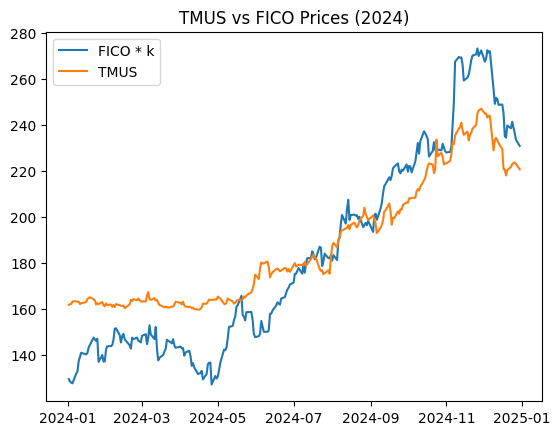

In [58]:
stock_1_name = 'TMUS'
stock_2_name = 'FICO'

stock_1 = yf.download(stock_1_name, start=start_date, end=end_date, auto_adjust=False, progress = False)['Close']
stock_2 = yf.download(stock_2_name, start=start_date, end=end_date, auto_adjust=False, progress = False)['Close']

def bnd_agg_constant(k):
    common_idx = stock_1.index.intersection(stock_2.index)
    s1 = stock_1.loc[common_idx]
    s2 = stock_2.loc[common_idx]
    return np.sum((s1.values - k * s2.values) ** 2)

result = minimize_scalar(bnd_agg_constant)
k_bnd_agg = result.x
print(f"Optimal k for {stock_1_name} and {stock_2_name}: {k_bnd_agg:.4f}")

common_idx = stock_1.index.intersection(stock_2.index)
plt.plot(common_idx, stock_2.loc[common_idx].values * k_bnd_agg, label=f'{stock_2_name} * k')
plt.plot(common_idx, stock_1.loc[common_idx].values, label=stock_1_name)
plt.legend()
plt.title(f'{stock_1_name} vs {stock_2_name} Prices (2024)')
plt.show()

TO DO
- Continue explore and identify the best stock pair(s) to trade
- Determine the stationary/cointegration of all pairs of stocks - and the best one to trade

Note: Best = tradeoff between volatility and stationarity 
- Create an indicator that is a function of how much two stocks are above and below (should be ~50%) and their ADF/E-G p-values

C:\Users\yuqua\AppData\Local\Temp\ipykernel_16276\945616462.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start="2024-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
C:\Users\yuqua\AppData\Local\Temp\ipykernel_16276\945616462.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download("MSFT", start="2024-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Optimal k: 0.4953


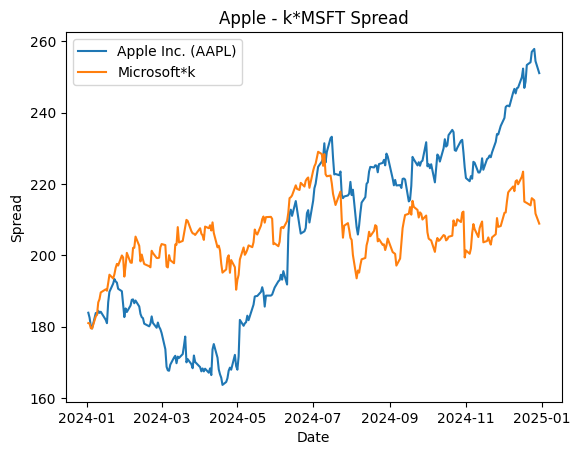

In [30]:
apple = yf.download("AAPL", start="2024-01-01", end="2024-12-31") 
plt.plot(apple.index, apple['Close'], label='Apple Inc. (AAPL)')
msft = yf.download("MSFT", start="2024-01-01", end="2024-12-31") 
# plt.plot(msft.index, msft['Close'], label='Microsoft Corp. (MSFT)')

# Find k to minimize the sum of squared differences between Apple and k * MSFT
def apple_msft_constant(k):
    common_idx = apple.index.intersection(msft.index)
    apple_close = apple.loc[common_idx, ('Close', 'AAPL')]
    msft_close = msft.loc[common_idx, ('Close', 'MSFT')]
    return np.sum((apple_close - k * msft_close) ** 2)

k_apple_msft = minimize_scalar(apple_msft_constant)

print(f"Optimal k: {k_apple_msft.x:.4f}")

# Plot the difference using optimal k
common_idx = apple.index.intersection(msft.index)
spread = apple.loc[common_idx, ('Close', 'AAPL')] - k_apple_msft.x * msft.loc[common_idx, ('Close', 'MSFT')]

plt.plot(msft['Close']*k_apple_msft.x, label='Microsoft*k')

plt.legend()
plt.title('Apple - k*MSFT Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()
